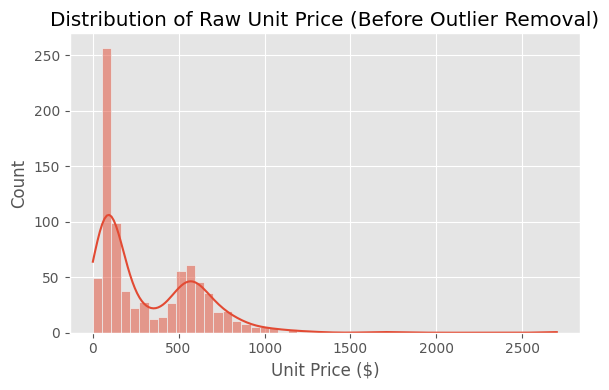

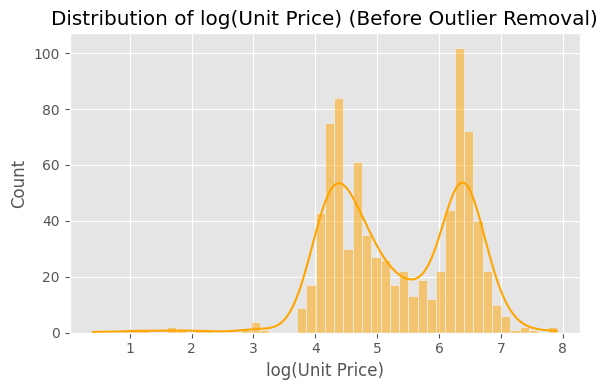


🔎 Identifying outliers using standardized residuals and leverage...
🚨 Outliers flagged: 36 / 829
✅ Remaining observations: 793
🚨 Total unusual observations flagged: 45
↪ Based on: |standardized residual| > 2 OR leverage > 0.0870
↪ Total rows in dataset: 793
↪ Fraction of outliers: 5.67%

📋 Top 10 most extreme standardized residuals:
                                        Item Description  log_unit_price  \
15658  MICRO-MILL ASPHALTIC CONCRETE PAVEMENT, VARIAB...        1.704748   
19559                       Conc Pavt, Nonreinf, 10 inch        4.624973   
9994                CONCRETE PAVEMENT ( 8 IN. NON-REINF)        4.430817   
10870               CONCRETE PAVEMENT ( 7 IN. NON-REINF)        4.828314   
9998                CONCRETE PAVEMENT ( 8 IN. NON-REINF)        4.518522   
11958  6 INCH REINFORCED PORTLAND CEMENT CONCRETE PAV...        5.062595   
15659  MICRO-MILL ASPHALTIC CONCRETE PAVEMENT, VARIAB...        1.848455   
10426               CONCRETE PAVEMENT ( 8 IN. NON-REINF)

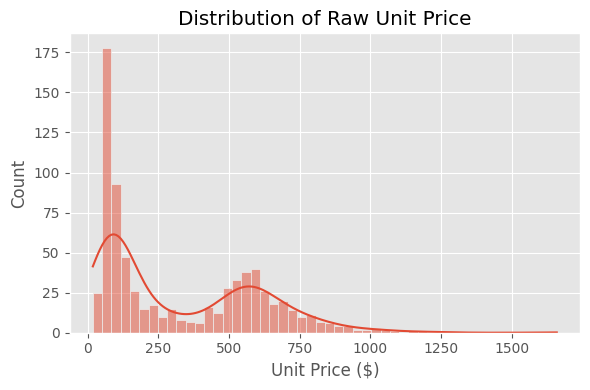

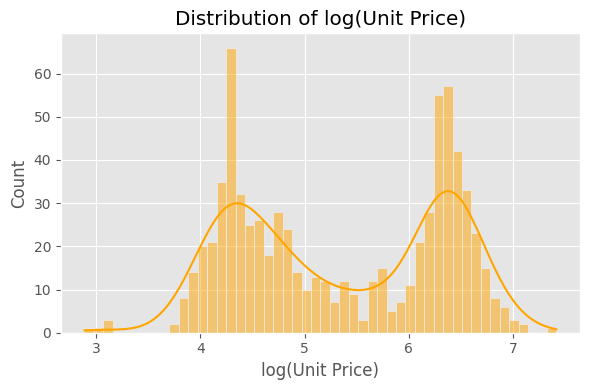


📋 Top 5 Most Expensive Unit Prices:
                                     Item Description  Unit Price  Quantity  \
13695  12 INCH PORTLAND CEMENT CONCRETE APPROACH SLAB      1660.0      46.0   
13609  12 INCH PORTLAND CEMENT CONCRETE APPROACH SLAB      1250.0     186.0   
13612  12 INCH PORTLAND CEMENT CONCRETE APPROACH SLAB      1200.0     186.0   
13610  12 INCH PORTLAND CEMENT CONCRETE APPROACH SLAB      1144.0     186.0   
13197  12 INCH PORTLAND CEMENT CONCRETE APPROACH SLAB      1100.0      44.0   

       Category  
13695  Pavement  
13609  Pavement  
13612  Pavement  
13610  Pavement  
13197  Pavement  


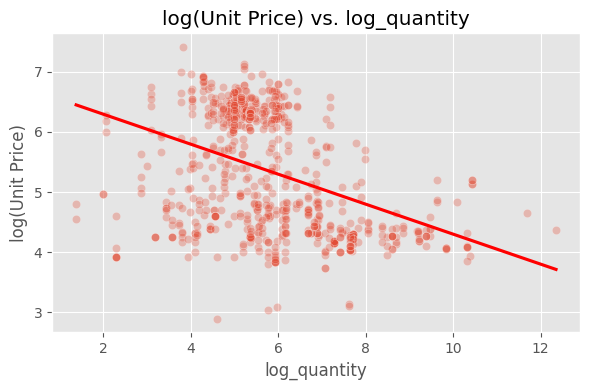

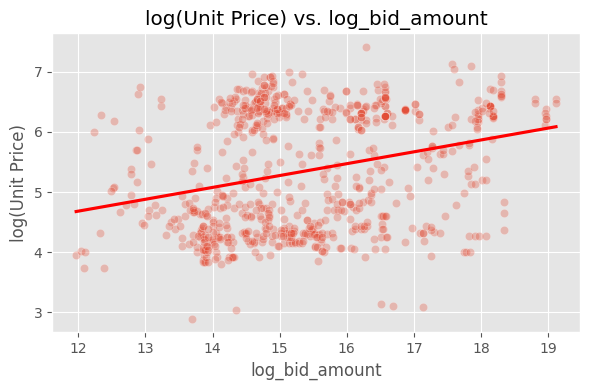

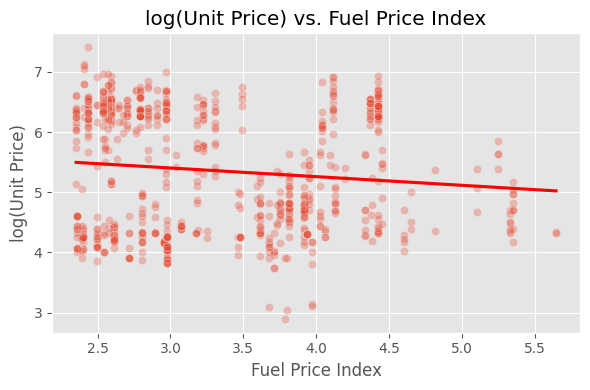

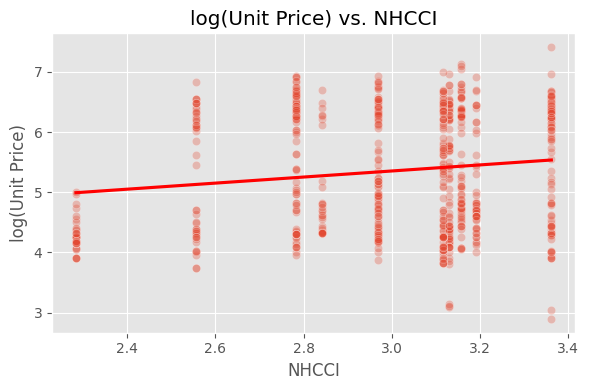

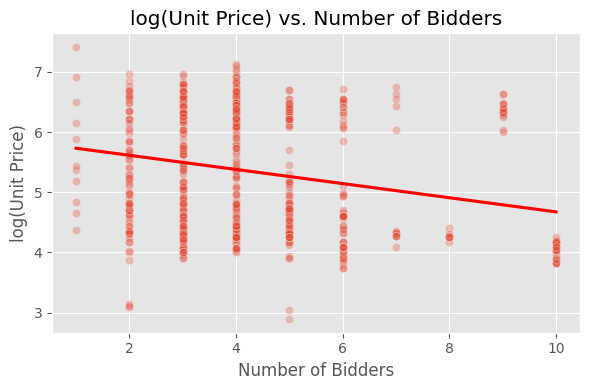

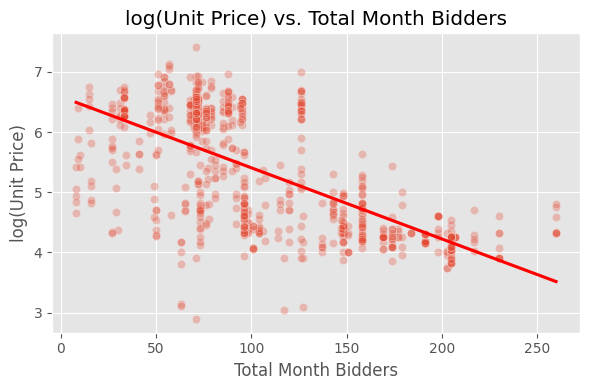

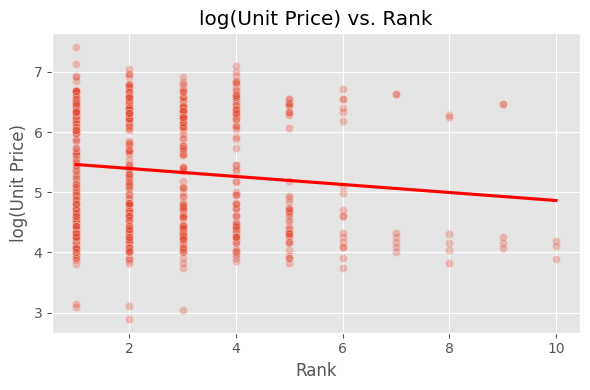

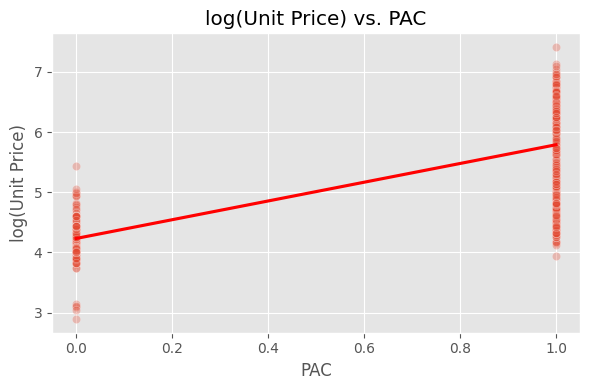

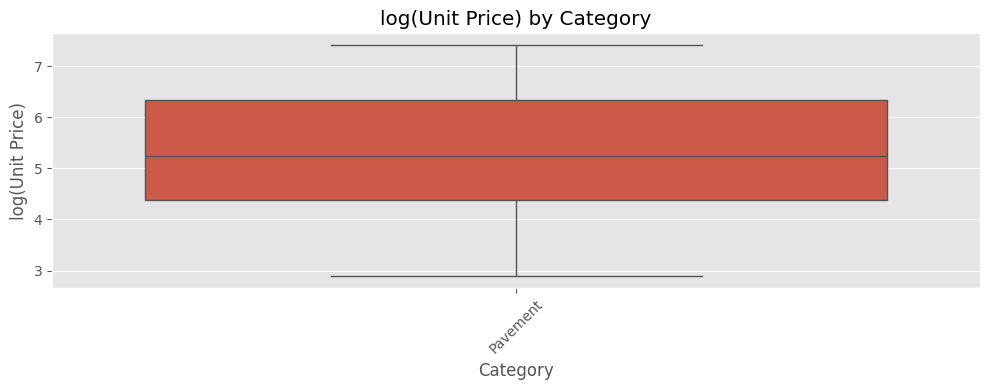

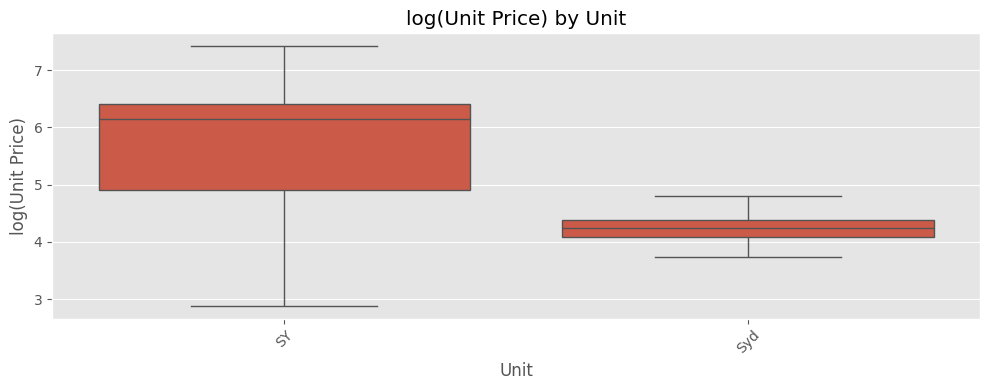

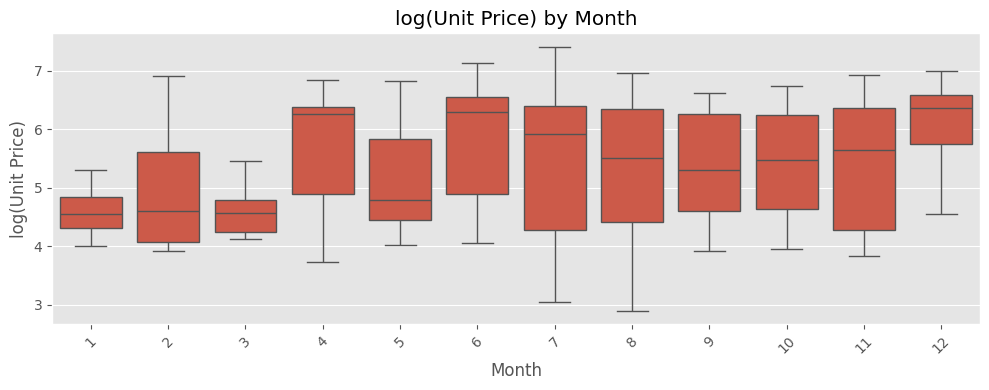

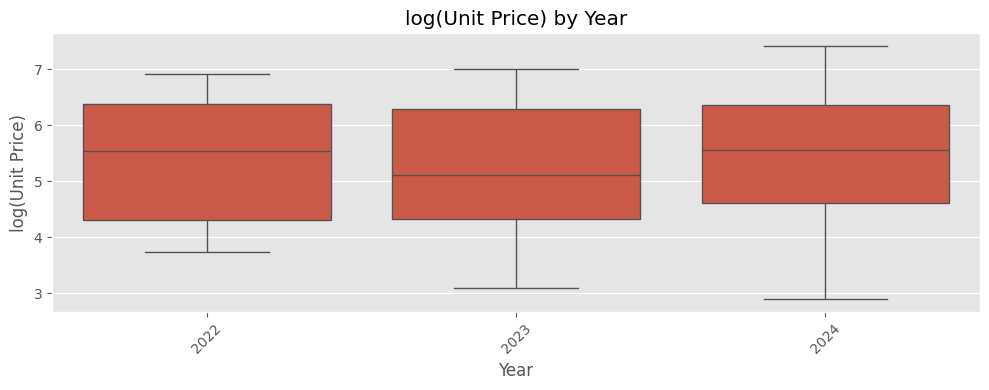


🔍 Checking for suspiciously low unit prices (log_unit_price < -4)...
Empty DataFrame
Columns: [Item Description, Unit Price, Quantity, Bid Amount, Category, log_unit_price]
Index: []

⚠️ Total observations with log_unit_price < -4: 0

📊 Variance Inflation Factors (VIF):
               Feature         VIF
0                const  427.557538
1                  PAC    2.897991
2         log_quantity    1.151332
3       log_bid_amount    1.170680
4     Fuel Price Index    1.443128
5                NHCCI    1.410429
6    Number of Bidders    1.813887
7  Total Month Bidders    2.615670
8                 Rank    1.558434
                            OLS Regression Results                            
Dep. Variable:         log_unit_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     225.2
Date:                Thu, 17 Jul 2025   Prob (F-statistic):   

Co-variance matrix is underdetermined. Inference will be invalid!



📋 DML Summary for CATE_logUnitPrice:
ATE: -0.285616, CI: [-0.474738, -0.096494], Std: 2.578307, IQR: 2.693915, CV: 9.027186

📋 DML Summary for CATE_UnitPrice:
ATE: -391.169460, CI: [-461.624673, -320.714247], Std: 960.519457, IQR: 1085.425617, CV: 2.455507


Co-variance matrix is underdetermined. Inference will be invalid!


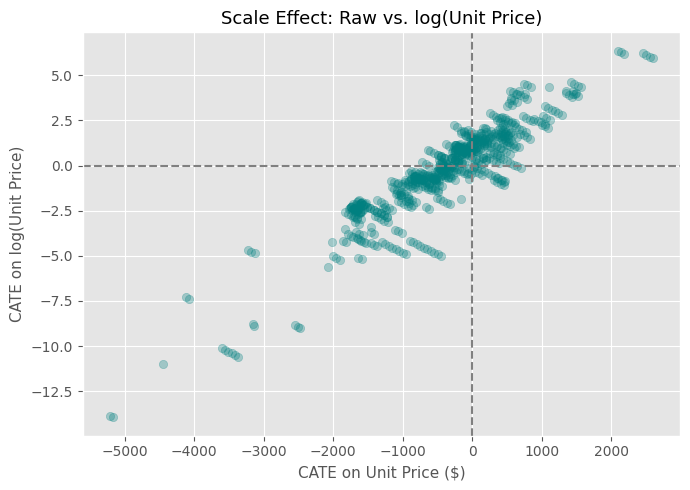

                            WLS Regression Results                            
Dep. Variable:         log_unit_price   R-squared:                       0.538
Model:                            WLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     830.1
Date:                Thu, 17 Jul 2025   Prob (F-statistic):          1.34e-121
Time:                        12:06:55   Log-Likelihood:                -770.92
No. Observations:                 714   AIC:                             1546.
Df Residuals:                     712   BIC:                             1555.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1435      0.048     86.951      0.0

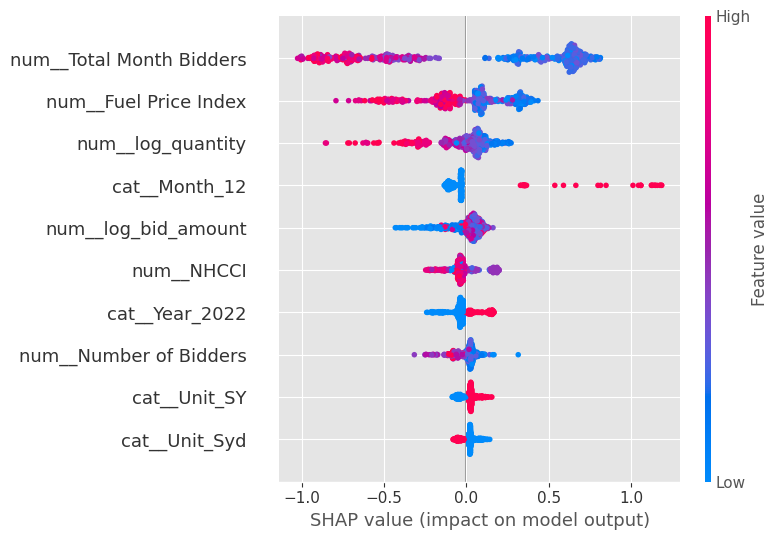


📈 SHAP (Without PAC) — unit_price


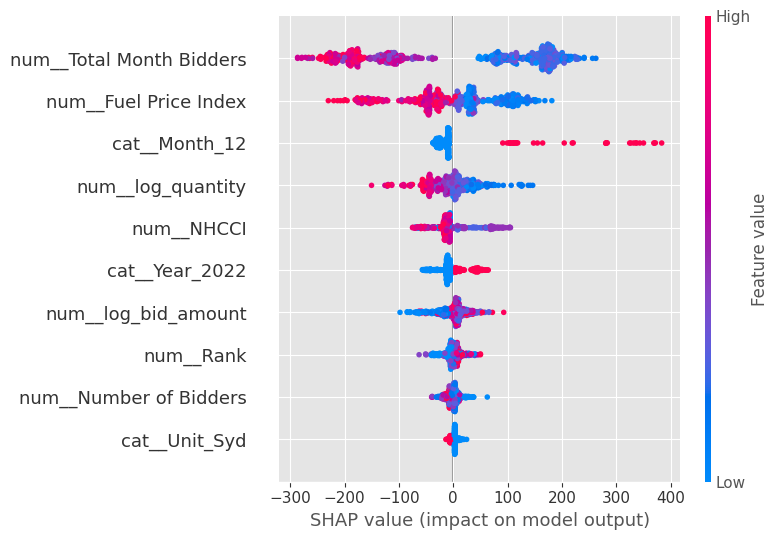


📈 SHAP (With PAC) — log_unit_price


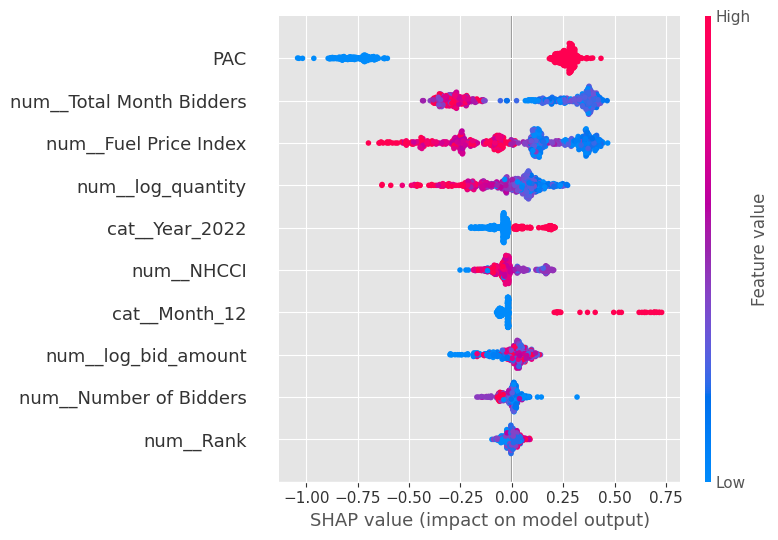


📈 SHAP (With PAC) — unit_price


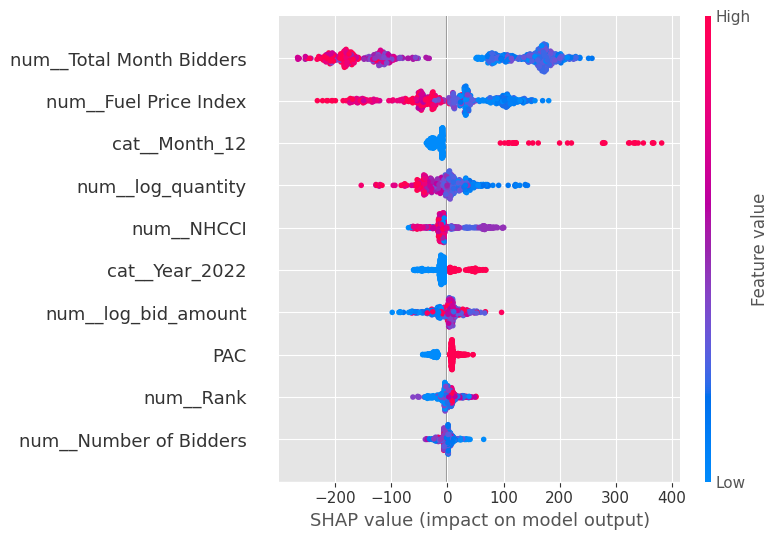


📋 PSM (Nearest Neighbor Matching) Summary:
ATT: 2.908868, CI: [2.839996, 2.977741], Std Error: 0.035139


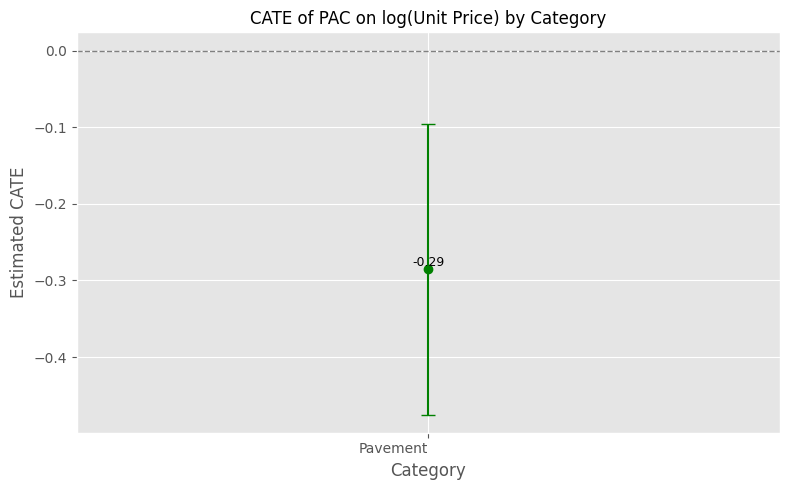

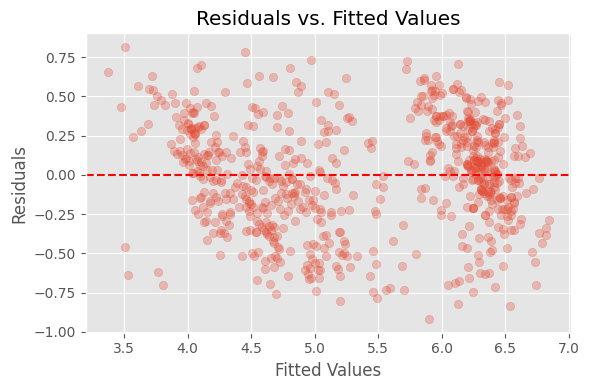

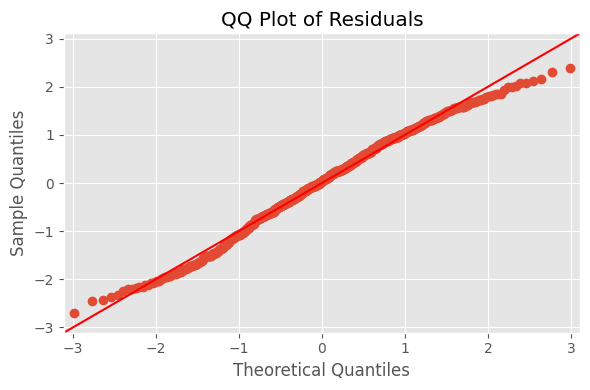


📋 Breusch–Pagan Test for Heteroskedasticity:
Statistic: 70.0495, p-value: 0.0000

📋 Cook's Distance:
45 influential observations out of 714 (6.30%)


KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



📋 Residual Clusters (k=3):
resid_cluster
0    335
1    183
2    196
Name: count, dtype: int64

📋 ANOVA Results for OLS:
                              sum_sq     df            F         PR(>F)
C(Month)                   34.854134   11.0    26.569797   2.714168e-46
C(Year)                    35.190207    2.0   147.542949   4.386517e-54
C(Unit)                     3.032368    1.0    25.427788   5.874207e-07
PAC                        18.745591    1.0   157.190308   1.231951e-32
log_quantity               11.396961    1.0    95.568701   3.147635e-21
log_bid_amount              9.393777    1.0    78.771092   5.935273e-18
Q('Fuel Price Index')     132.552398    1.0  1111.512157  5.252712e-146
NHCCI                      15.892064    1.0   133.262185   2.591851e-28
Q('Number of Bidders')      1.561311    1.0    13.092303   3.181405e-04
Q('Total Month Bidders')    0.041783    1.0     0.350374   5.540953e-01
Rank                        0.632322    1.0     5.302308   2.159344e-02
Residual       

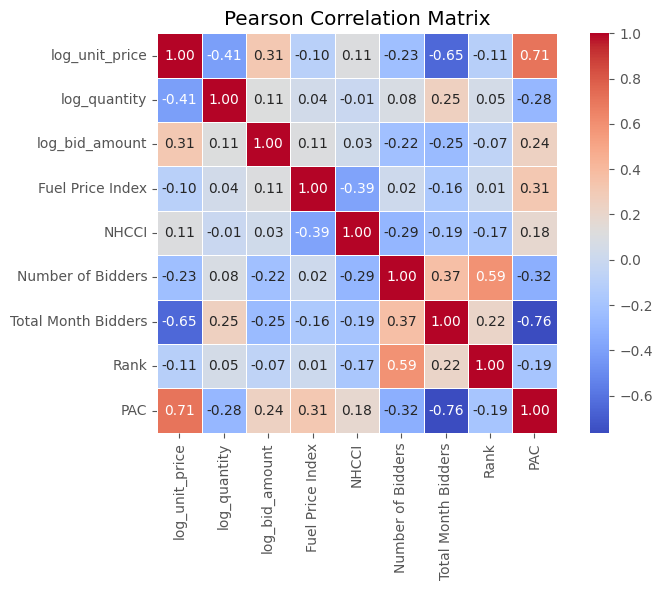

In [1]:
# === Step 0: Setup ===
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from econml.dml import LinearDML
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import NearestNeighbors
import shap

# Reproducibility
random.seed(42)
np.random.seed(42)
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
mplstyle.use('ggplot')

# === Step 1: Load Data ===
df = pd.read_csv(r"\\homes.mtu.edu\home\Desktop\Raw Data\Filtered\filtered_bidtabs_ALL.csv", low_memory=False)

# Merge Category
mapping = pd.read_csv(r"\\homes.mtu.edu\home\Desktop\Raw Data\iTEMs.csv")
mapping = mapping[['Item Description', 'Group']].drop_duplicates()
mapping.columns = ['Item Description', 'Category']
df = df.merge(mapping, on='Item Description', how='left')

# === Step 2: Clean and Preprocess ===
df['Quantity'] = pd.to_numeric(df['Quantity'].astype(str).str.replace(',', ''), errors='coerce')
df['Bid Amount'] = pd.to_numeric(df['Bid Amount'].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

df.dropna(subset=['PAC', 'Fuel Price Index', 'NHCCI', 'Unit Price', 'Year', 'Rank', 'Category'], inplace=True)
for col in ['Unit Price', 'Quantity', 'Bid Amount']:
    df = df[df[col] > 0]

df = df[(df['Quantity'] > 0) & (df['Bid Amount'] > 0) & (df['Unit Price'] > 0.01)]

# Variable transformations (only the ones needed for regression)
df['log_unit_price'] = np.log(df['Unit Price'])
df['log_quantity'] = np.log(df['Quantity'])
df['log_bid_amount'] = np.log(df['Bid Amount'])

# Standardize units
unit_map = {'CUYD': 'CY', 'Cyd': 'CY', 'CY': 'CY',
            'SQYD': 'SY', 'SY': 'SY',
            'TON': 'TN', 'TN': 'TN'}
df['Unit'] = df['Unit'].map(unit_map).fillna(df['Unit'])

# Filter
df = df[~df['Category'].isin(['Borrow', 'Topsoil'])]
df = df[df['Unit'] != 'LS']
df = df[df['Category'] == 'Pavement']  

# Diagnostic plot BEFORE outlier removal
plt.figure(figsize=(6, 4))
sns.histplot(df['Unit Price'], kde=True, bins=50)
plt.title('Distribution of Raw Unit Price (Before Outlier Removal)')
plt.xlabel('Unit Price ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['log_unit_price'], kde=True, bins=50, color='orange')
plt.title('Distribution of log(Unit Price) (Before Outlier Removal)')
plt.xlabel('log(Unit Price)')
plt.tight_layout()
plt.show()


# === Step 2C: Outlier Detection Only ===
print("\n🔎 Identifying outliers using standardized residuals and leverage...")
ols_formula = (
    "log_unit_price ~ PAC + log_quantity + log_bid_amount + Q('Fuel Price Index') + "
    "NHCCI + C(Month) + C(Year) + C(Unit)"
)
ols_model_temp = smf.ols(formula=ols_formula, data=df).fit(cov_type='HC1')
influence = ols_model_temp.get_influence()
standard_resid = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag

k = ols_model_temp.df_model + 1
n = ols_model_temp.nobs
leverage_cutoff = 3 * k / n

df['standard_resid'] = standard_resid
df['leverage'] = leverage
df['unusual'] = (np.abs(standard_resid) > 2) | (leverage > leverage_cutoff)

print(f"🚨 Outliers flagged: {df['unusual'].sum()} / {len(df)}")
df = df[~df['unusual']].copy()
print(f"✅ Remaining observations: {len(df)}")


ols_formula = (
    "log_unit_price ~ PAC + log_quantity + log_bid_amount + Q('Fuel Price Index') + "
    "NHCCI + Q('Number of Bidders') + Q('Total Month Bidders') + Q('Rank') + "
    "C(Month) + C(Year) + C(Category) + C(Unit)"
)
ols_model_temp = smf.ols(formula=ols_formula, data=df).fit(cov_type='HC1')

influence_temp = ols_model_temp.get_influence()
standard_resid_temp = influence_temp.resid_studentized_internal
leverage_temp = influence_temp.hat_matrix_diag
k_temp = ols_model_temp.df_model + 1
n_temp = ols_model_temp.nobs
leverage_cutoff_temp = 3 * k_temp / n_temp

# Flag and remove outliers
df['standard_resid'] = standard_resid_temp
df['leverage'] = leverage_temp
df['unusual'] = (np.abs(standard_resid_temp) > 2) | (leverage_temp > leverage_cutoff_temp)

total_outliers_temp = df['unusual'].sum()
print(f"🚨 Total unusual observations flagged: {total_outliers_temp}")
print(f"↪ Based on: |standardized residual| > 2 OR leverage > {leverage_cutoff_temp:.4f}")
print(f"↪ Total rows in dataset: {len(df)}")
print(f"↪ Fraction of outliers: {total_outliers_temp / len(df):.2%}")
print("\n📋 Top 10 most extreme standardized residuals:")
print(df.loc[df['unusual'], ['Item Description', 'log_unit_price', 'standard_resid', 'leverage']]
         .sort_values(by='standard_resid', key=np.abs, ascending=False).head(10))

print("\n✅ Dropping unusual observations from the dataset...")
df = df[~df['unusual']].copy()
print(f"Remaining observations after dropping outliers: {len(df)}")

# Refit OLS after outliers are removed
ols_model = smf.ols(formula=ols_formula, data=df).fit(cov_type='HC1')


# === Step 2C: Outcome & Predictor Diagnostics ===
print("\n📊 Outcome and Predictor Diagnostic Checks")

# 1. Distribution of Unit Price and log(Unit Price)
plt.figure(figsize=(6, 4))
sns.histplot(df['Unit Price'], kde=True, bins=50)
plt.title('Distribution of Raw Unit Price')
plt.xlabel('Unit Price ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['log_unit_price'], kde=True, bins=50, color='orange')
plt.title('Distribution of log(Unit Price)')
plt.xlabel('log(Unit Price)')
plt.tight_layout()
plt.show()

# 2. Detect most extreme bid prices (outliers)
print("\n📋 Top 5 Most Expensive Unit Prices:")
print(df[['Item Description', 'Unit Price', 'Quantity', 'Category']].sort_values(by='Unit Price', ascending=False).head(5))

# 3. Scatterplots: log(Unit Price) vs. numerical predictors
numeric_predictors = [
    'log_quantity', 'log_bid_amount',
    'Fuel Price Index', 'NHCCI',
    'Number of Bidders', 'Total Month Bidders', 'Rank',
    'PAC'
]

for col in numeric_predictors:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='log_unit_price', alpha=0.3)
    sns.regplot(data=df, x=col, y='log_unit_price', scatter=False, color='red', ci=None)
    plt.title(f'log(Unit Price) vs. {col}')
    plt.xlabel(col)
    plt.ylabel('log(Unit Price)')
    plt.tight_layout()
    plt.show()

# 4. Boxplots: log(Unit Price) by categorical variables
categorical_predictors = ['Category', 'Unit', 'Month', 'Year']
for col in categorical_predictors:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=col, y='log_unit_price', showfliers=False)
    plt.xticks(rotation=45)
    plt.title(f'log(Unit Price) by {col}')
    plt.xlabel(col)
    plt.ylabel('log(Unit Price)')
    plt.tight_layout()
    plt.show()
    

# === Step 2B (continued): Detect suspiciously low unit prices ===
print("\n🔍 Checking for suspiciously low unit prices (log_unit_price < -4)...")

# Inspect rows
suspicious_rows = df[df['log_unit_price'] < -4][
    ['Item Description', 'Unit Price', 'Quantity', 'Bid Amount', 'Category', 'log_unit_price']
].sort_values(by='Unit Price')

# Show top 10 problematic rows
print(suspicious_rows.head(10))

# Count how many total
print(f"\n⚠️ Total observations with log_unit_price < -4: {len(suspicious_rows)}")


#VIF Check (after preprocessing and before modeling) ===
# Prepare dataframe for VIF: Only numerical variables can be used
X_vif = df[['PAC', 'log_quantity', 'log_bid_amount', 'Fuel Price Index', 'NHCCI',
            'Number of Bidders', 'Total Month Bidders', 'Rank']].dropna()

# Add constant term
X_vif_const = sm.add_constant(X_vif)

# Compute VIFs
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

print("\n📊 Variance Inflation Factors (VIF):")
print(vif_data)

# === Step 3: OLS Regression ===
ols_formula = (
    "log_unit_price ~ PAC + log_quantity + log_bid_amount + Q('Fuel Price Index') + "
    "NHCCI + Q('Number of Bidders') + Q('Total Month Bidders') + Q('Rank') + "
    "C(Month) + C(Year) + C(Category) + C(Unit)"
)

ols_model = smf.ols(formula=ols_formula, data=df).fit(cov_type='HC1')
print(ols_model.summary())

# === Step 3B: Outlier Detection Using Standardized Residuals and Leverage ===
print("\n🔎 Identifying unusual observations based on standardized residuals and leverage...")

influence = ols_model.get_influence()
standard_resid = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag
k = ols_model.df_model + 1
n = ols_model.nobs
leverage_cutoff = 3 * k / n

df['standard_resid'] = standard_resid
df['leverage'] = leverage
df['unusual'] = (np.abs(standard_resid) > 2) | (leverage > leverage_cutoff)

total_outliers = df['unusual'].sum()
print(f"🚨 Total unusual observations flagged: {total_outliers}")
print(f"↪ Based on: |standardized residual| > 2 OR leverage > {leverage_cutoff:.4f}")
print(f"↪ Total rows in dataset: {len(df)}")
print(f"↪ Fraction of outliers: {total_outliers / len(df):.2%}")

print("\n📋 Top 10 most extreme standardized residuals:")
print(df.loc[df['unusual'], ['Item Description', 'log_unit_price', 'standard_resid', 'leverage']]
         .sort_values(by='standard_resid', key=np.abs, ascending=False).head(10))

print("\n✅ Dropping unusual observations from the dataset...")
df = df[~df['unusual']].copy()
print(f"Remaining observations after dropping outliers: {len(df)}")

# Refit OLS after outliers are removed
ols_model = smf.ols(formula=ols_formula, data=df).fit(cov_type='HC1')
print("\n📋 OLS Summary after Outlier Removal:")
print(ols_model.summary())

# Recalculate residuals and fitted values for updated model
influence = ols_model.get_influence()
df['standard_resid'] = influence.resid_studentized_internal
df['leverage'] = influence.hat_matrix_diag
residuals = ols_model.resid
fitted = ols_model.fittedvalues


# === Step 4: Prepare Features ===
X_cols = [
    'log_quantity', 'log_bid_amount', 'Fuel Price Index', 'NHCCI',
    'Number of Bidders', 'Total Month Bidders', 'Rank',
    'Month', 'Year', 'Category', 'Unit'
]
cat_cols = ['Month', 'Year', 'Category', 'Unit']
num_cols = [col for col in X_cols if col not in cat_cols]

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imp', SimpleImputer(strategy='mean')),
        ('scale', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

X = preprocessor.fit_transform(df[X_cols])
X = X.toarray() if hasattr(X, 'toarray') else X
D = df['PAC'].values

# === Step 5A: DML — Unit Price ===
Y_price = df['Unit Price'].values
dml_price = LinearDML(
    model_y=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    model_t=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    discrete_treatment=True,
    cv=KFold(n_splits=2, shuffle=True, random_state=42),
    random_state=42
)
dml_price.fit(Y_price, D, X=X)
df['CATE_UnitPrice'] = dml_price.effect(X)

# === Step 5B: DML — log(Unit Price) ===
Y_log = df['log_unit_price'].values
dml_log = LinearDML(
    model_y=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    model_t=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    discrete_treatment=True,
    cv=KFold(n_splits=2, shuffle=True, random_state=42),
    random_state=42
)
dml_log.fit(Y_log, D, X=X)
df['CATE_logUnitPrice'] = dml_log.effect(X)

# === Step 5C: Summary Stats ===
for col in ['CATE_logUnitPrice', 'CATE_UnitPrice']:
    cate = df[col]
    ate = np.mean(cate)
    std = np.std(cate)
    iqr = np.percentile(cate, 75) - np.percentile(cate, 25)
    ci_low = ate - 1.96 * std / np.sqrt(len(cate))
    ci_high = ate + 1.96 * std / np.sqrt(len(cate))
    cv = std / np.abs(ate) if ate != 0 else np.nan
    print(f"\n\U0001F4CB DML Summary for {col}:")
    print(f"ATE: {ate:.6f}, CI: [{ci_low:.6f}, {ci_high:.6f}], Std: {std:.6f}, IQR: {iqr:.6f}, CV: {cv:.6f}")

# === Step 5D: Compare Raw vs Log CATEs (Scale effect visualization) ===
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(df['CATE_UnitPrice'], df['CATE_logUnitPrice'], alpha=0.3, color='teal')
ax.axhline(0, linestyle='--', color='gray')
ax.axvline(0, linestyle='--', color='gray')
ax.set_xlabel("CATE on Unit Price ($)", fontsize=11)
ax.set_ylabel("CATE on log(Unit Price)", fontsize=11)
ax.set_title("Scale Effect: Raw vs. log(Unit Price)", fontsize=13)
plt.tight_layout()
plt.show()

# === Step 6: IPW Estimation ===
ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(X, D)
propensity_scores = ps_model.predict_proba(X)[:, 1]
df['ipw_weight'] = np.where(D == 1, 1 / propensity_scores, 1 / (1 - propensity_scores))
ipw_model = sm.WLS(df['log_unit_price'], sm.add_constant(D), weights=df['ipw_weight']).fit()
print(ipw_model.summary())

# === Step 7: SHAP Interpretation (With & Without PAC) ===

from sklearn.model_selection import StratifiedShuffleSplit

# Step 7.1 — Convert X to DataFrame with feature names
feature_names = preprocessor.get_feature_names_out()
X_df_full = pd.DataFrame(X, columns=feature_names)

# Step 7.2 — First get a stratified 80% sample (float)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
shap_sample_idx, _ = next(sss.split(X_df_full, D))

# Then sample up to 1000 rows from this 80% sample
sample_pool = X_df_full.iloc[shap_sample_idx].copy()
sample_size = min(1000, len(sample_pool))
shap_sample_idx_final = np.random.choice(sample_pool.index, size=sample_size, replace=False)

# Final SHAP input sample
X_sample_base = X_df_full.loc[shap_sample_idx_final].copy()
D_sample = D[shap_sample_idx_final]

# For Code 1
Y_log_sample = Y_log[shap_sample_idx_final]
Y_price_sample = Y_price[shap_sample_idx_final]

# Confirm PAC distribution
print("\n🎯 PAC distribution in SHAP sample:")
print(pd.Series(D_sample).value_counts())

# Step 7.3 — With and Without PAC
X_sample_with_pac = X_sample_base.copy()
X_sample_with_pac['PAC'] = D_sample
cols = ['PAC'] + [col for col in X_sample_with_pac.columns if col != 'PAC']
X_sample_with_pac = X_sample_with_pac[cols]

X_sample_no_pac = X_sample_with_pac.drop(columns=['PAC'])

# === Step 7A — SHAP Without PAC
print("\n📈 SHAP (Without PAC) — log_unit_price")
model_log_no_pac = RandomForestRegressor(random_state=42)
model_log_no_pac.fit(X_sample_no_pac, Y_log_sample)
explainer_log_no_pac = shap.TreeExplainer(model_log_no_pac)
shap_values_log_no_pac = explainer_log_no_pac.shap_values(X_sample_no_pac, check_additivity=False)
shap.summary_plot(shap_values_log_no_pac, X_sample_no_pac, max_display=10)

print("\n📈 SHAP (Without PAC) — unit_price")
model_price_no_pac = RandomForestRegressor(random_state=42)
model_price_no_pac.fit(X_sample_no_pac, Y_price_sample)
explainer_price_no_pac = shap.TreeExplainer(model_price_no_pac)
shap_values_price_no_pac = explainer_price_no_pac.shap_values(X_sample_no_pac, check_additivity=False)
shap.summary_plot(shap_values_price_no_pac, X_sample_no_pac, max_display=10)

# === Step 7B — SHAP With PAC
print("\n📈 SHAP (With PAC) — log_unit_price")
model_log_with_pac = RandomForestRegressor(random_state=42)
model_log_with_pac.fit(X_sample_with_pac, Y_log_sample)
explainer_log_with_pac = shap.TreeExplainer(model_log_with_pac)
shap_values_log_with_pac = explainer_log_with_pac.shap_values(X_sample_with_pac, check_additivity=False)
shap.summary_plot(shap_values_log_with_pac, X_sample_with_pac, max_display=10)

print("\n📈 SHAP (With PAC) — unit_price")
model_price_with_pac = RandomForestRegressor(random_state=42)
model_price_with_pac.fit(X_sample_with_pac, Y_price_sample)
explainer_price_with_pac = shap.TreeExplainer(model_price_with_pac)
shap_values_price_with_pac = explainer_price_with_pac.shap_values(X_sample_with_pac, check_additivity=False)
shap.summary_plot(shap_values_price_with_pac, X_sample_with_pac, max_display=10)


# === Step 8: PSM Estimation (ATT) ===
df_psm = df.copy()
df_psm['pscore'] = propensity_scores

treated = df_psm[df_psm['PAC'] == 1].reset_index(drop=True)
control = df_psm[df_psm['PAC'] == 0].reset_index(drop=True)

nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(control['pscore'].values.reshape(-1, 1))
dists, indices = nn.kneighbors(treated['pscore'].values.reshape(-1, 1))

matched_control = control.iloc[indices.flatten()].reset_index(drop=True)
att = (treated['log_unit_price'].values - matched_control['log_unit_price'].values).mean()
se = (treated['log_unit_price'].values - matched_control['log_unit_price'].values).std() / np.sqrt(len(treated))
ci_low = att - 1.96 * se
ci_high = att + 1.96 * se

print("\n\U0001F4CB PSM (Nearest Neighbor Matching) Summary:")
print(f"ATT: {att:.6f}, CI: [{ci_low:.6f}, {ci_high:.6f}], Std Error: {se:.6f}")

# === Step 9: Enhanced CATE Heterogeneity Plot by Category ===

# Ensure required columns exist
if 'Category' in df.columns and 'CATE_logUnitPrice' in df.columns:
    # Aggregate CATE stats
    cate_by_group = df.groupby('Category')['CATE_logUnitPrice'].agg(['mean', 'count', 'std'])
    cate_by_group['sem'] = cate_by_group['std'] / np.sqrt(cate_by_group['count'])
    cate_by_group['ci_low'] = cate_by_group['mean'] - 1.96 * cate_by_group['sem']
    cate_by_group['ci_high'] = cate_by_group['mean'] + 1.96 * cate_by_group['sem']
    
    # Sort by CATE mean
    cate_by_group = cate_by_group.sort_values('mean', ascending=False)

    # Determine significance (CI does NOT include zero)
    cate_by_group['significant'] = ~((cate_by_group['ci_low'] <= 0) & (cate_by_group['ci_high'] >= 0))
    colors = ['green' if sig else 'gray' for sig in cate_by_group['significant']]

    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.axhline(0, linestyle='--', color='gray', linewidth=1)

    for i, (cat, row) in enumerate(cate_by_group.iterrows()):
        ax.errorbar(i, row['mean'], yerr=1.96 * row['sem'], fmt='o', color=colors[i], capsize=5)
        ax.text(i, row['mean'], f"{row['mean']:.2f}", ha='center', va='bottom', fontsize=9)

    ax.set_xticks(range(len(cate_by_group)))
    ax.set_xticklabels(cate_by_group.index, rotation=0, ha='right')
    ax.set_title('CATE of PAC on log(Unit Price) by Category', fontsize=12)
    ax.set_ylabel('Estimated CATE')
    ax.set_xlabel('Category')
    plt.tight_layout()
    plt.show()
    
    
# === Step 10: Residual Diagnostics ===
# Residuals vs. Fitted and QQ plot to check assumptions of linear regression
import scipy.stats as stats

# Extract residuals and fitted values
residuals = ols_model.resid
fitted = ols_model.fittedvalues

# Residuals vs. Fitted Plot
plt.figure(figsize=(6, 4))
plt.scatter(fitted, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.tight_layout()
plt.show()

# QQ Plot
fig = plt.figure(figsize=(6, 4))
sm.qqplot(residuals, line='45', fit=True, ax=fig.add_subplot(111))
plt.title('QQ Plot of Residuals')
plt.tight_layout()
plt.show()

# === Step 10B: Residual Clustering and Influence Diagnostics ===

from statsmodels.stats.diagnostic import het_breuschpagan

# (a) Breusch–Pagan Test for Heteroskedasticity
exog = ols_model.model.exog
bp_test = het_breuschpagan(residuals, exog)
print("\n📋 Breusch–Pagan Test for Heteroskedasticity:")
print(f"Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")

# (b) Cook's Distance to detect influential observations
influence = ols_model.get_influence()
(c, p) = influence.cooks_distance
n = len(df)
high_influence_count = sum(c > 4/n)
print(f"\n📋 Cook's Distance:")
print(f"{high_influence_count} influential observations out of {n} ({100*high_influence_count/n:.2f}%)")

# (c) Optional: Clustering of Residuals (KMeans)
from sklearn.cluster import KMeans

cluster_input = np.column_stack((fitted, residuals))
kmeans = KMeans(n_clusters=3, random_state=42)
df['resid_cluster'] = kmeans.fit_predict(cluster_input)

# Count of data points in each residual cluster
print("\n📋 Residual Clusters (k=3):")
print(df['resid_cluster'].value_counts().sort_index())


# === Step 11: ANOVA Test for OLS ===
from statsmodels.stats.anova import anova_lm

# Check if 'Unit' has more than one category
if df['Unit'].nunique() > 1:
    anova_formula = (
        "log_unit_price ~ PAC + log_quantity + log_bid_amount + "
        "Q('Fuel Price Index') + NHCCI + Q('Number of Bidders') + Q('Total Month Bidders') + Rank + "
        "C(Month) + C(Year) + C(Unit)"
    )
else:
    anova_formula = (
        "log_unit_price ~ PAC + log_quantity + log_bid_amount + "
        "Q('Fuel Price Index') + NHCCI + Q('Number of Bidders') + Q('Total Month Bidders') + Rank + "
        "C(Month) + C(Year)"
    )

anova_model = smf.ols(formula=anova_formula, data=df).fit()
anova_results = anova_lm(anova_model, typ=2)
print("\n📋 ANOVA Results for OLS:")
print(anova_results)

# === Step 12: Pearson Correlation Matrix ===
corr_cols = [
    'log_unit_price', 'log_quantity', 'log_bid_amount',
    'Fuel Price Index', 'NHCCI', 'Number of Bidders',
    'Total Month Bidders', 'Rank',
    'PAC'
]

# Drop rows with NaN in selected columns to avoid NaNs in the correlation matrix
df_corr = df[corr_cols].dropna()

# Compute correlation matrix
corr_matrix = df_corr.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            linewidths=0.5, linecolor='white')
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

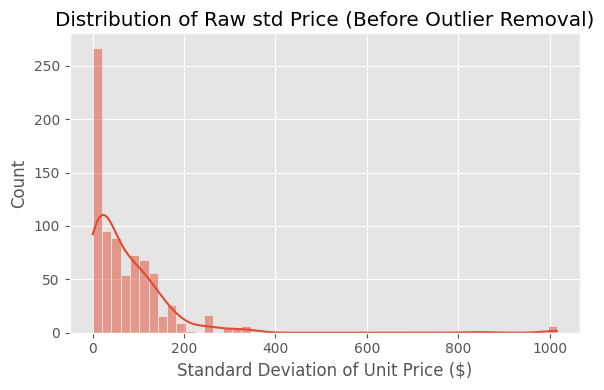

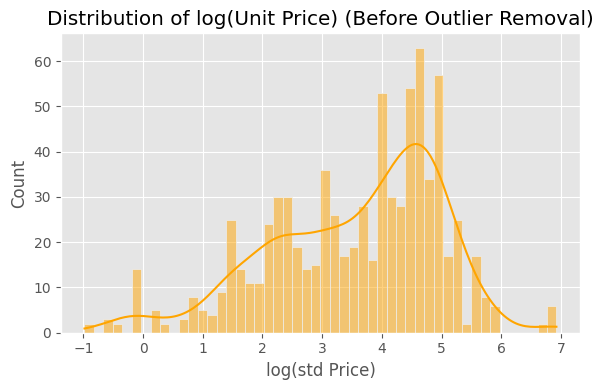


🔎 Identifying outliers using standardized residuals and leverage...
🚨 Outliers flagged: 35 / 794
✅ Remaining observations: 759
🚨 Total unusual observations flagged: 38
↪ Based on: |standardized residual| > 2 OR leverage > 0.0909
↪ Total rows in dataset: 759
↪ Fraction of outliers: 5.01%

📋 Top 10 most extreme standardized residuals:
                                        Item Description  log_std_price  \
14945  MICRO-MILL ASPHALTIC CONCRETE PAVEMENT, VARIAB...       2.039400   
14946  MICRO-MILL ASPHALTIC CONCRETE PAVEMENT, VARIAB...       2.039400   
19971                        Conc Pavt, Nonreinf, 9 inch       3.051734   
19970                        Conc Pavt, Nonreinf, 9 inch       3.051734   
19969                        Conc Pavt, Nonreinf, 9 inch       3.051734   
19968                        Conc Pavt, Nonreinf, 9 inch       3.051734   
12028  9 INCH NON-REINFORCED PORTLAND CEMENT CONCRETE...       5.511358   
12027  9 INCH NON-REINFORCED PORTLAND CEMENT CONCRETE...       5

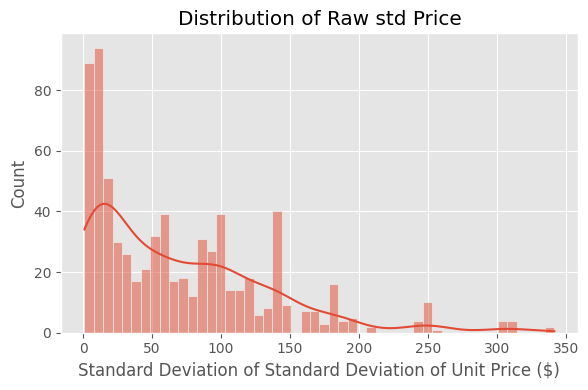

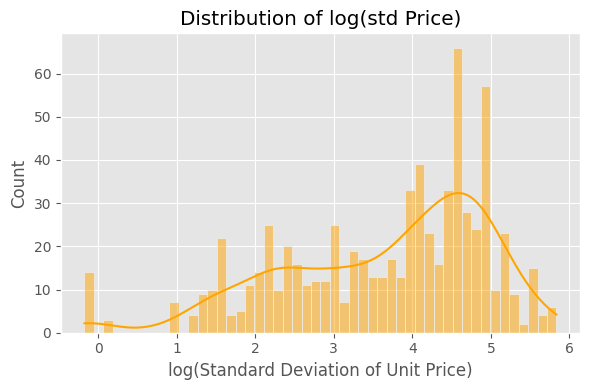


📋 Top 5 Most Expensive Unit Prices:
                                     Item Description  std_price  Quantity  \
13443  12 INCH PORTLAND CEMENT CONCRETE APPROACH SLAB    341.830      34.0   
13444  12 INCH PORTLAND CEMENT CONCRETE APPROACH SLAB    341.830      34.0   
13395  12 INCH PORTLAND CEMENT CONCRETE APPROACH SLAB    310.709     131.0   
13394  12 INCH PORTLAND CEMENT CONCRETE APPROACH SLAB    310.709     131.0   
13393  12 INCH PORTLAND CEMENT CONCRETE APPROACH SLAB    310.709     131.0   

       Category  
13443  Pavement  
13444  Pavement  
13395  Pavement  
13394  Pavement  
13393  Pavement  


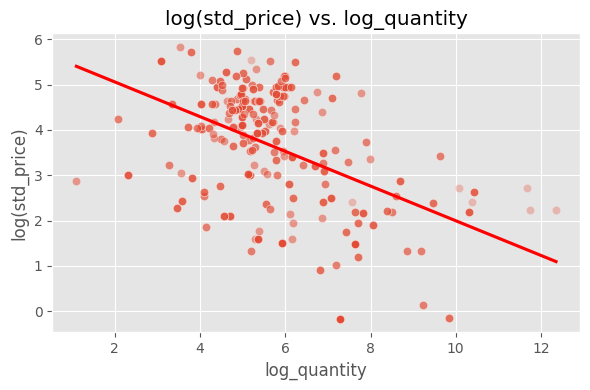

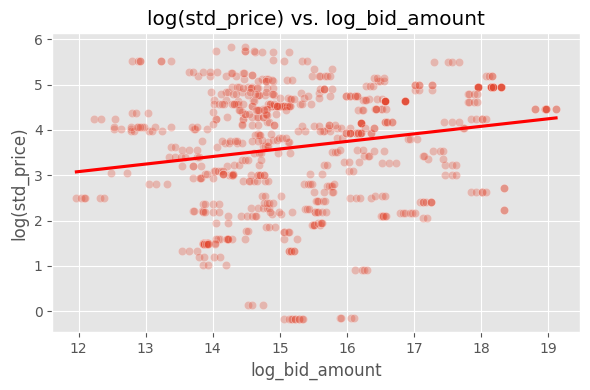

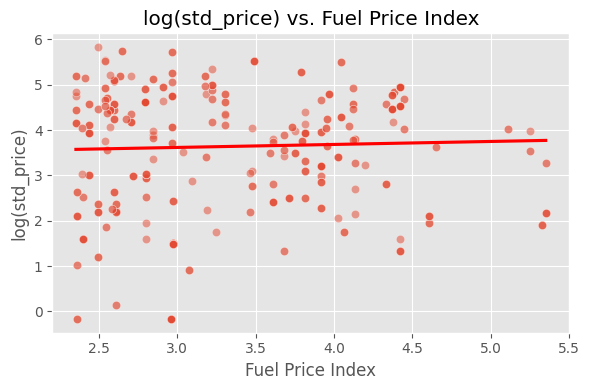

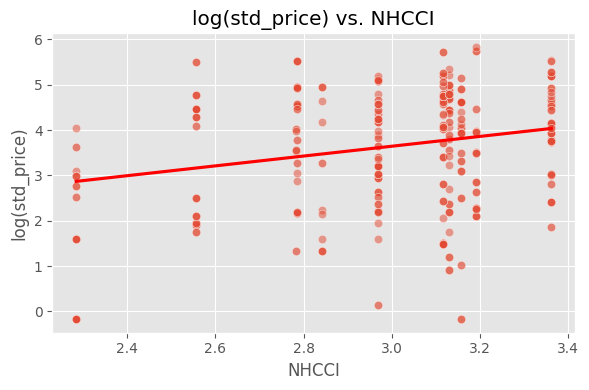

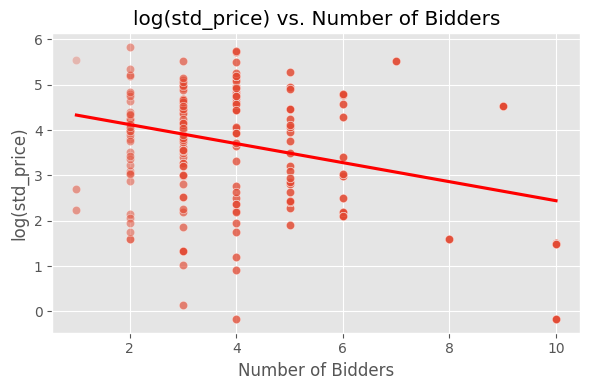

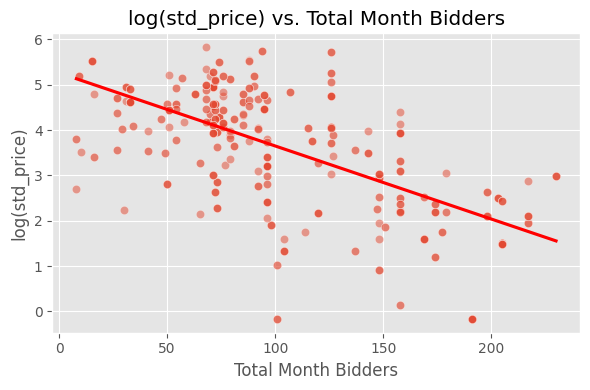

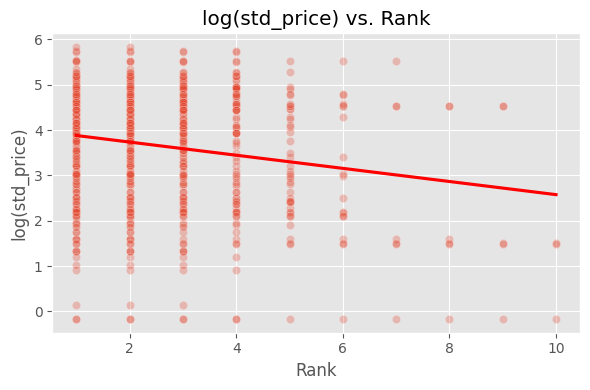

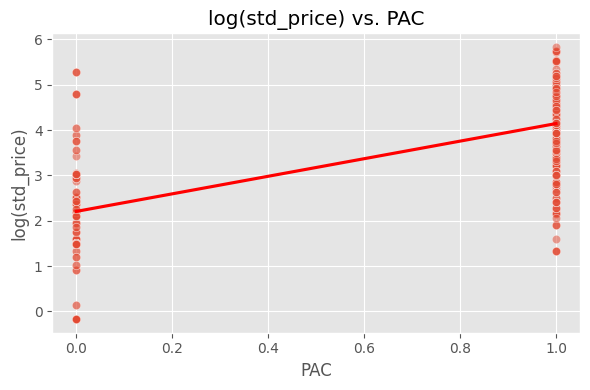

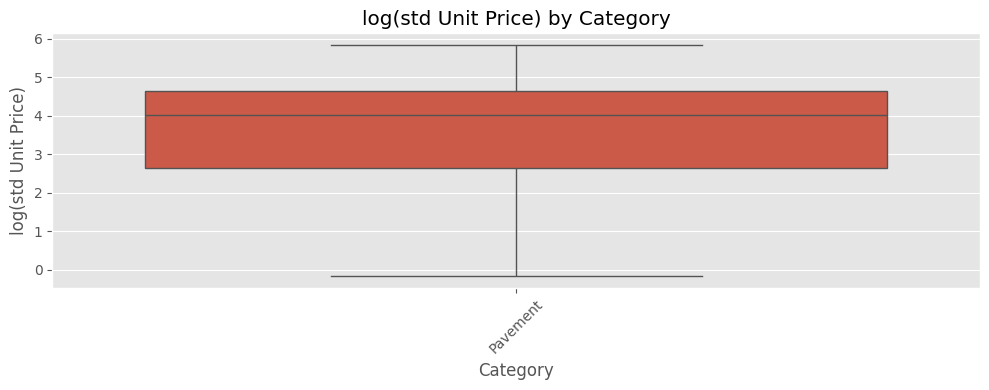

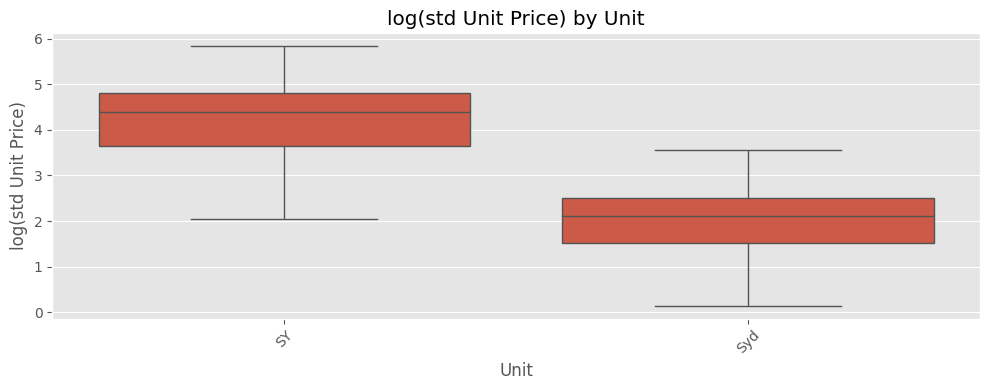

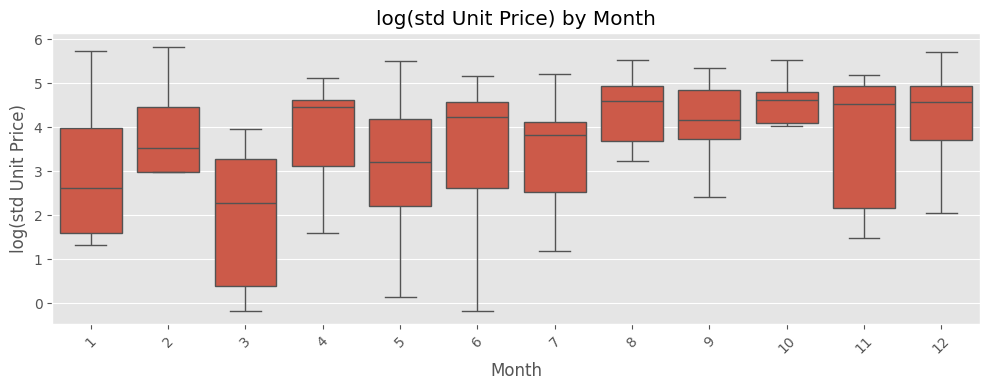

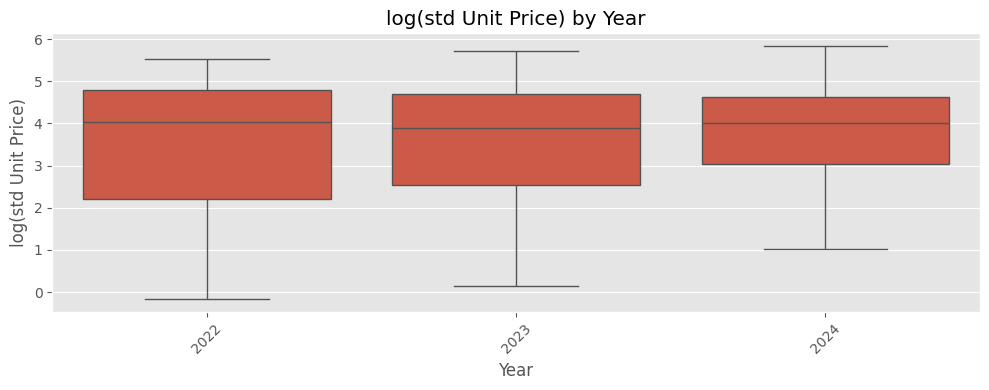


🔍 Checking for suspiciously low std prices (log_std_price < -4)...
Empty DataFrame
Columns: [Item Description, std_price, Quantity, Bid Amount, Category, log_std_price]
Index: []

⚠️ Total observations with log_std_price < -4: 0

📊 Variance Inflation Factors (VIF):
               Feature         VIF
0                const  437.037296
1                  PAC    2.560991
2         log_quantity    1.104632
3       log_bid_amount    1.225326
4     Fuel Price Index    1.366213
5                NHCCI    1.374022
6    Number of Bidders    1.830477
7  Total Month Bidders    2.374897
8                 Rank    1.525282
                            OLS Regression Results                            
Dep. Variable:          log_std_price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     123.2
Date:                Thu, 17 Jul 2025   Prob (F-statistic):        

Co-variance matrix is underdetermined. Inference will be invalid!



📋 DML Summary for CATE_logStdPrice:
ATE: 0.096833, CI: [-0.347295, 0.540961], Std: 5.947872, IQR: 5.723141, CV: 61.423812

📋 DML Summary for CATE_StdPrice:
ATE: 130.457420, CI: [99.196280, 161.718560], Std: 418.656995, IQR: 412.545995, CV: 3.209147


Co-variance matrix is underdetermined. Inference will be invalid!


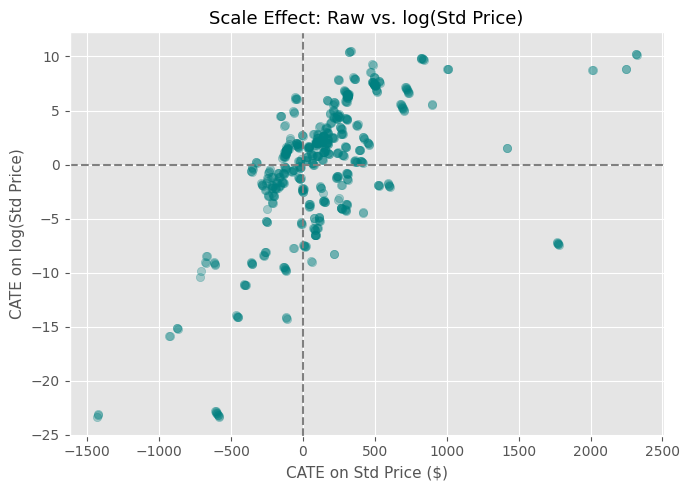

                            WLS Regression Results                            
Dep. Variable:          log_std_price   R-squared:                       0.324
Model:                            WLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     329.3
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           2.05e-60
Time:                        11:54:02   Log-Likelihood:                -1017.4
No. Observations:                 689   AIC:                             2039.
Df Residuals:                     687   BIC:                             2048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5044      0.077     32.538      0.0

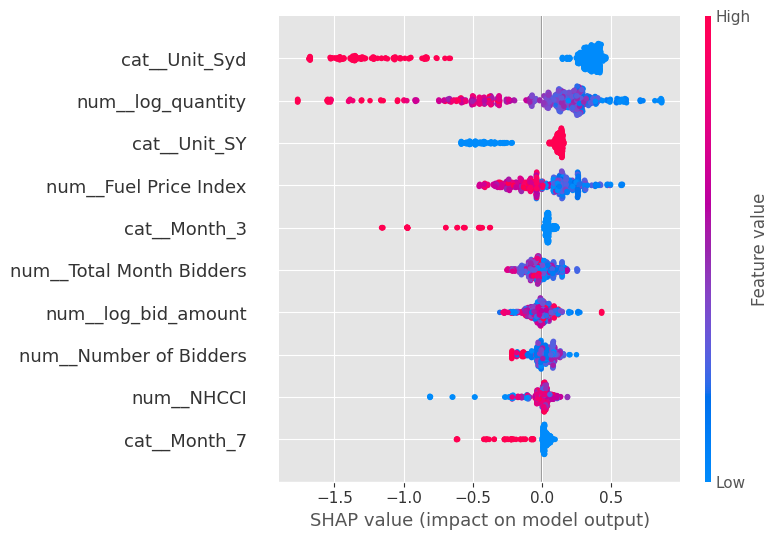


📈 SHAP (Without PAC) — std_price


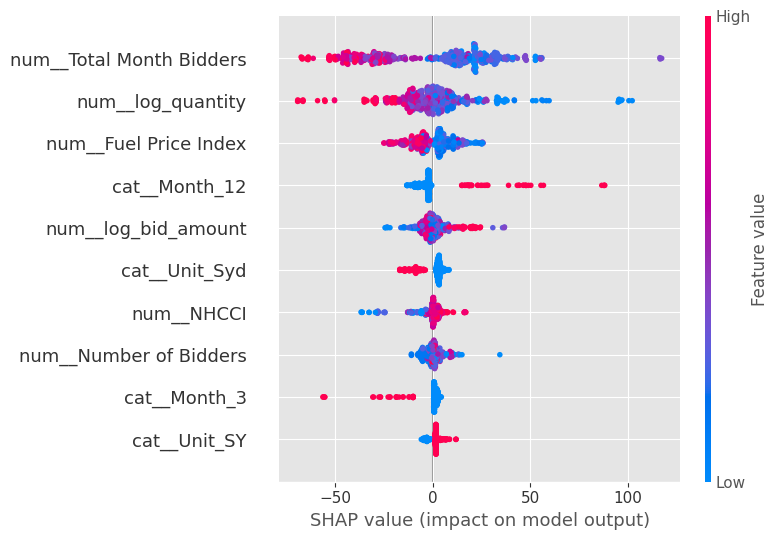


📈 SHAP (With PAC) — log_std_price


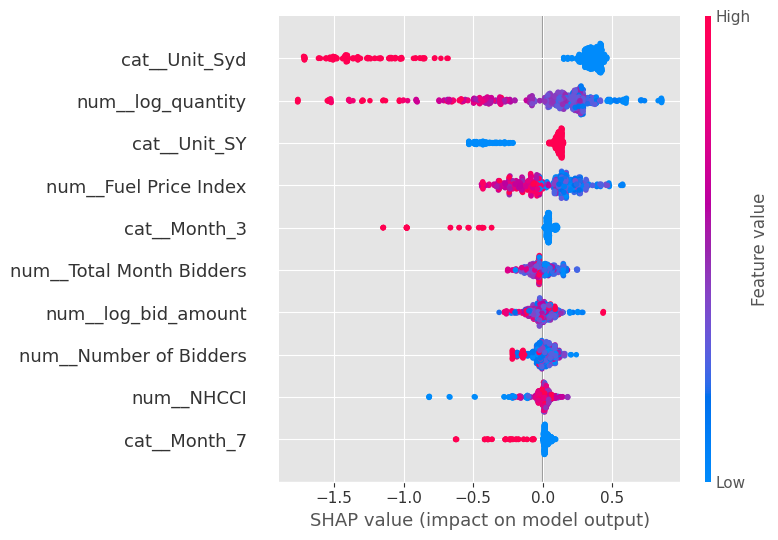


📈 SHAP (With PAC) — std_price


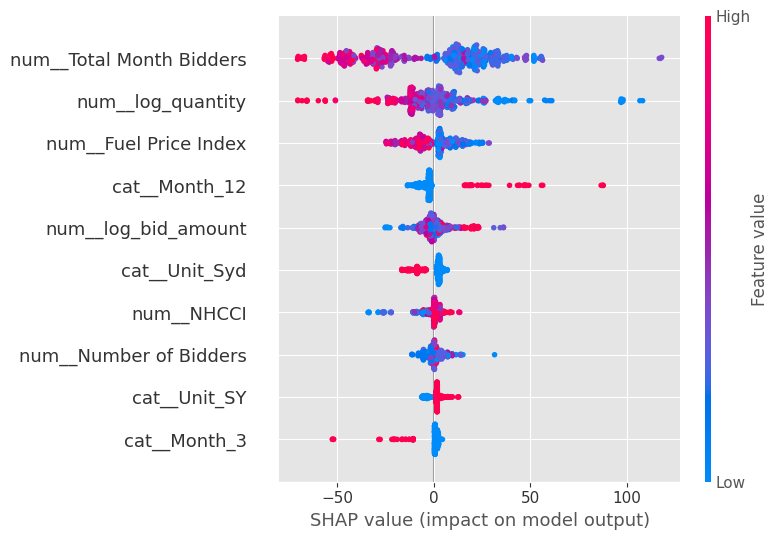


📋 PSM (Nearest Neighbor Matching) Summary:
ATT: -1.121628, CI: [-1.199071, -1.044186], Std Error: 0.039511


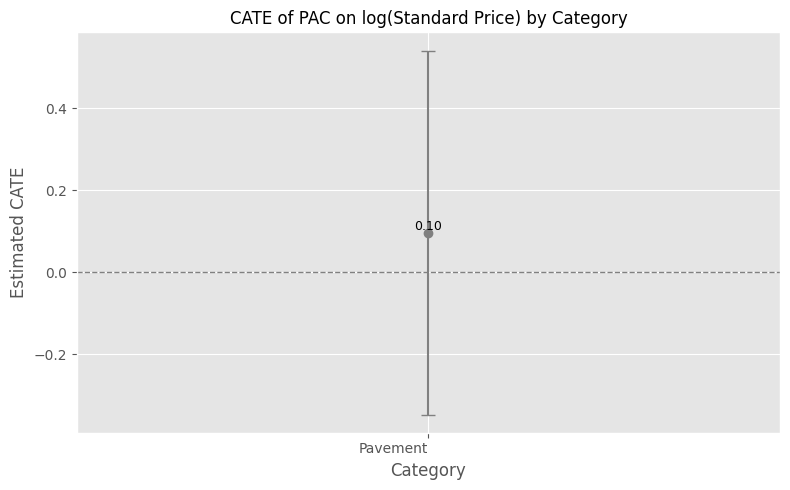

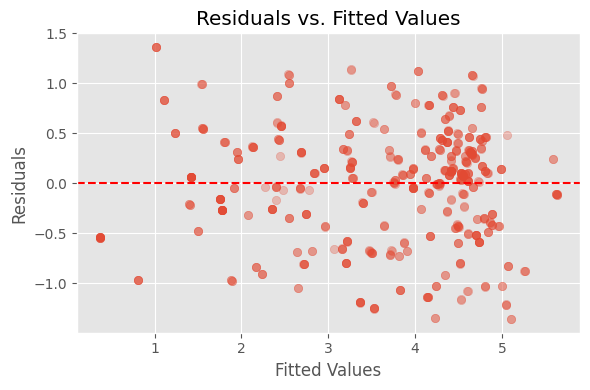

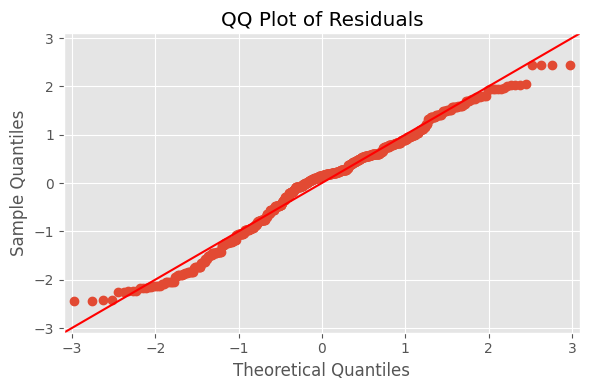


📋 Breusch–Pagan Test for Heteroskedasticity:
Statistic: 117.7969, p-value: 0.0000

📋 Cook's Distance:
39 influential observations out of 689 (5.66%)


KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



📋 Residual Clusters (k=3):
resid_cluster
0    378
1    138
2    173
Name: count, dtype: int64

📋 ANOVA Results for OLS:
                              sum_sq     df           F        PR(>F)
C(Month)                   75.956105   11.0   21.515002  1.188852e-37
C(Year)                    50.962609    2.0   79.394982  1.187345e-31
C(Unit)                   111.831392    1.0  348.445711  7.304280e-63
PAC                        14.919469    1.0   46.486275  2.071316e-11
log_quantity               54.411029    1.0  169.534595  1.088019e-34
log_bid_amount              0.345512    1.0    1.076551  2.998470e-01
Q('Fuel Price Index')      85.298045    1.0  265.772762  1.575833e-50
NHCCI                      34.150020    1.0  106.405079  3.026886e-23
Q('Number of Bidders')     10.658341    1.0   33.209399  1.265413e-08
Q('Total Month Bidders')    0.020574    1.0    0.064103  8.002024e-01
Rank                        0.000021    1.0    0.000066  9.935027e-01
Residual                  213.748382  6

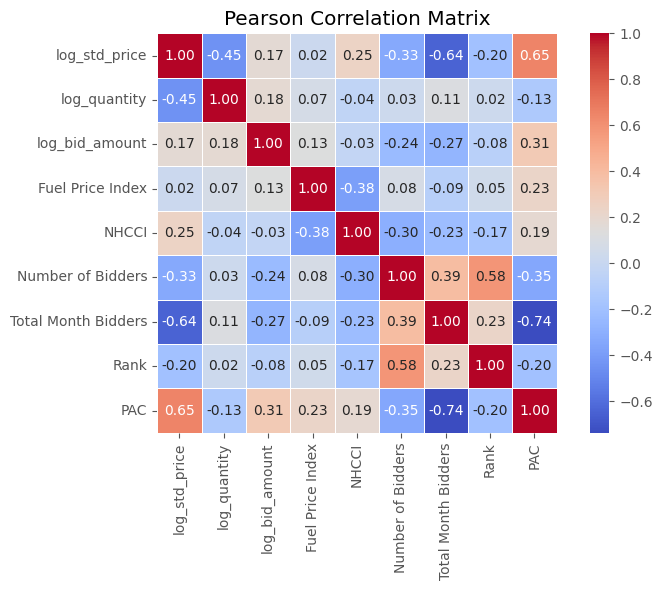

In [1]:
# === Step 0: Setup ===
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from econml.dml import LinearDML
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import NearestNeighbors
import shap

# Reproducibility
random.seed(42)
np.random.seed(42)
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
mplstyle.use('ggplot')

# === Step 1: Load Data ===
df = pd.read_csv(r"\\homes.mtu.edu\home\Desktop\Raw Data\Filtered\filtered_bidtabs_ALL.csv", low_memory=False)

# Merge Category
mapping = pd.read_csv(r"\\homes.mtu.edu\home\Desktop\Raw Data\iTEMs.csv")
mapping = mapping[['Item Description', 'Group']].drop_duplicates()
mapping.columns = ['Item Description', 'Category']
df = df.merge(mapping, on='Item Description', how='left')




# === Step 2: Clean and Preprocess ===
df['Quantity'] = pd.to_numeric(df['Quantity'].astype(str).str.replace(',', ''), errors='coerce')
df['Bid Amount'] = pd.to_numeric(df['Bid Amount'].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

df.dropna(subset=['PAC', 'Fuel Price Index', 'NHCCI', 'Unit Price', 'Year', 'Rank', 'Category'], inplace=True)
for col in ['Unit Price', 'Quantity', 'Bid Amount']:
    df = df[df[col] > 0]

df = df[(df['Quantity'] > 0) & (df['Bid Amount'] > 0) & (df['std_price'] > 0.01)]


# Variable transformations
df['log_std_price'] = np.log(df['std_price'])
df['log_quantity'] = np.log(df['Quantity'])
df['log_bid_amount'] = np.log(df['Bid Amount'])


# Standardize units
unit_map = {'CUYD': 'CY', 'Cyd': 'CY', 'CY': 'CY',
            'SQYD': 'SY', 'SY': 'SY',
            'TON': 'TN', 'TN': 'TN'}
df['Unit'] = df['Unit'].map(unit_map).fillna(df['Unit'])

# Filter
df = df[~df['Category'].isin(['Borrow', 'Topsoil'])]
df = df[df['Unit'] != 'LS']
df = df[df['Category'] == 'Pavement']  

# Diagnostic plot BEFORE outlier removal
plt.figure(figsize=(6, 4))
sns.histplot(df['std_price'], kde=True, bins=50)
plt.title('Distribution of Raw std Price (Before Outlier Removal)')
plt.xlabel('Standard Deviation of Unit Price ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['log_std_price'], kde=True, bins=50, color='orange')
plt.title('Distribution of log(Unit Price) (Before Outlier Removal)')
plt.xlabel('log(std Price)')
plt.tight_layout()
plt.show()





# === Step 2C: Outlier Detection Only ===
print("\n🔎 Identifying outliers using standardized residuals and leverage...")
ols_formula = (
    "log_std_price ~ PAC + log_quantity + log_bid_amount + Q('Fuel Price Index') + "
    "NHCCI + C(Month) + C(Year) + C(Unit)"
)
ols_model_temp = smf.ols(formula=ols_formula, data=df).fit(cov_type='HC1')
influence = ols_model_temp.get_influence()
standard_resid = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag

k = ols_model_temp.df_model + 1
n = ols_model_temp.nobs
leverage_cutoff = 3 * k / n

df['standard_resid'] = standard_resid
df['leverage'] = leverage
df['unusual'] = (np.abs(standard_resid) > 2) | (leverage > leverage_cutoff)

print(f"🚨 Outliers flagged: {df['unusual'].sum()} / {len(df)}")
df = df[~df['unusual']].copy()
print(f"✅ Remaining observations: {len(df)}")


ols_formula = (
    "log_std_price ~ PAC + log_quantity + log_bid_amount + Q('Fuel Price Index') + "
    "NHCCI + Q('Number of Bidders') + Q('Total Month Bidders') + Q('Rank') + "
    "C(Month) + C(Year) + C(Category) + C(Unit)"
)
ols_model_temp = smf.ols(formula=ols_formula, data=df).fit(cov_type='HC1')

influence_temp = ols_model_temp.get_influence()
standard_resid_temp = influence_temp.resid_studentized_internal
leverage_temp = influence_temp.hat_matrix_diag
k_temp = ols_model_temp.df_model + 1
n_temp = ols_model_temp.nobs
leverage_cutoff_temp = 3 * k_temp / n_temp

# Flag and remove outliers
df['standard_resid'] = standard_resid_temp
df['leverage'] = leverage_temp
df['unusual'] = (np.abs(standard_resid_temp) > 2) | (leverage_temp > leverage_cutoff_temp)

total_outliers_temp = df['unusual'].sum()
print(f"🚨 Total unusual observations flagged: {total_outliers_temp}")
print(f"↪ Based on: |standardized residual| > 2 OR leverage > {leverage_cutoff_temp:.4f}")
print(f"↪ Total rows in dataset: {len(df)}")
print(f"↪ Fraction of outliers: {total_outliers_temp / len(df):.2%}")
print("\n📋 Top 10 most extreme standardized residuals:")
print(df.loc[df['unusual'], ['Item Description', 'log_std_price', 'standard_resid', 'leverage']]
         .sort_values(by='standard_resid', key=np.abs, ascending=False).head(10))

print("\n✅ Dropping unusual observations from the dataset...")
df = df[~df['unusual']].copy()
print(f"Remaining observations after dropping outliers: {len(df)}")

# Refit OLS after outliers are removed
ols_model = smf.ols(formula=ols_formula, data=df).fit(cov_type='HC1')




# === Step 2C: Outcome & Predictor Diagnostics ===
print("\n📊 Outcome and Predictor Diagnostic Checks")

# 1. Distribution of Unit Price and log(std Price)
plt.figure(figsize=(6, 4))
sns.histplot(df['std_price'], kde=True, bins=50)
plt.title('Distribution of Raw std Price')
plt.xlabel('Standard Deviation of Standard Deviation of Unit Price ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['log_std_price'], kde=True, bins=50, color='orange')
plt.title('Distribution of log(std Price)')
plt.xlabel('log(Standard Deviation of Unit Price)')
plt.tight_layout()
plt.show()

# 2. Detect most extreme bid prices (outliers)
print("\n📋 Top 5 Most Expensive Unit Prices:")
print(df[['Item Description', 'std_price', 'Quantity', 'Category']].sort_values(by='std_price', ascending=False).head(5))

# 3. Scatterplots: log(Unit Price) vs. numerical predictors
numeric_predictors = [
    'log_quantity', 'log_bid_amount',
    'Fuel Price Index', 'NHCCI',
    'Number of Bidders', 'Total Month Bidders', 'Rank',
    'PAC'
]

for col in numeric_predictors:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='log_std_price', alpha=0.3)
    sns.regplot(data=df, x=col, y='log_std_price', scatter=False, color='red', ci=None)
    plt.title(f'log(std_price) vs. {col}')
    plt.xlabel(col)
    plt.ylabel('log(std_price)')
    plt.tight_layout()
    plt.show()

# 4. Boxplots: log(Unit Price) by categorical variables
categorical_predictors = ['Category', 'Unit', 'Month', 'Year']
for col in categorical_predictors:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=col, y='log_std_price', showfliers=False)
    plt.xticks(rotation=45)
    plt.title(f'log(std Unit Price) by {col}')
    plt.xlabel(col)
    plt.ylabel('log(std Unit Price)')
    plt.tight_layout()
    plt.show()


    
# === Step 2B (continued): Detect suspiciously low std prices ===
print("\n🔍 Checking for suspiciously low std prices (log_std_price < -4)...")

# Inspect rows
suspicious_rows = df[df['log_std_price'] < -4][
    ['Item Description', 'std_price', 'Quantity', 'Bid Amount', 'Category', 'log_std_price']
].sort_values(by='std_price')

# Show top 10 problematic rows
print(suspicious_rows.head(10))

# Count how many total
print(f"\n⚠️ Total observations with log_std_price < -4: {len(suspicious_rows)}")
    


#VIF Check (after preprocessing and before modeling) ===
# Prepare dataframe for VIF: Only numerical variables can be used
X_vif = df[['PAC', 'log_quantity', 'log_bid_amount', 'Fuel Price Index', 'NHCCI',
            'Number of Bidders', 'Total Month Bidders', 'Rank']].dropna()

# Add constant term
X_vif_const = sm.add_constant(X_vif)

# Compute VIFs
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

print("\n📊 Variance Inflation Factors (VIF):")
print(vif_data)





# === Step 3: OLS Regression ===
ols_formula = (
    "log_std_price ~ PAC + log_quantity + log_bid_amount + Q('Fuel Price Index') + "
    "NHCCI + Q('Number of Bidders') + Q('Total Month Bidders') + Q('Rank') + "
    "C(Month) + C(Year) + C(Category) + C(Unit)"
)

ols_model = smf.ols(formula=ols_formula, data=df).fit(cov_type='HC1')
print(ols_model.summary())

# === Step 3B: Outlier Detection Using Standardized Residuals and Leverage ===
print("\n🔎 Identifying unusual observations based on standardized residuals and leverage...")

influence = ols_model.get_influence()
standard_resid = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag
k = ols_model.df_model + 1
n = ols_model.nobs
leverage_cutoff = 3 * k / n

df['standard_resid'] = standard_resid
df['leverage'] = leverage
df['unusual'] = (np.abs(standard_resid) > 2) | (leverage > leverage_cutoff)

total_outliers = df['unusual'].sum()
print(f"🚨 Total unusual observations flagged: {total_outliers}")
print(f"↪ Based on: |standardized residual| > 2 OR leverage > {leverage_cutoff:.4f}")
print(f"↪ Total rows in dataset: {len(df)}")
print(f"↪ Fraction of outliers: {total_outliers / len(df):.2%}")

print("\n📋 Top 10 most extreme standardized residuals:")
print(df.loc[df['unusual'], ['Item Description', 'log_std_price', 'standard_resid', 'leverage']]
         .sort_values(by='standard_resid', key=np.abs, ascending=False).head(10))

print("\n✅ Dropping unusual observations from the dataset...")
df = df[~df['unusual']].copy()
print(f"Remaining observations after dropping outliers: {len(df)}")

# Refit OLS after outliers are removed
ols_model = smf.ols(formula=ols_formula, data=df).fit(cov_type='HC1')
print("\n📋 OLS Summary after Outlier Removal:")
print(ols_model.summary())

# Recalculate residuals and fitted values for updated model
influence = ols_model.get_influence()
df['standard_resid'] = influence.resid_studentized_internal
df['leverage'] = influence.hat_matrix_diag
residuals = ols_model.resid
fitted = ols_model.fittedvalues



# === Step 4: Prepare Features ===
X_cols = [
    'log_quantity', 'log_bid_amount', 'Fuel Price Index', 'NHCCI',
    'Number of Bidders', 'Total Month Bidders', 'Rank',
    'Month', 'Year', 'Category', 'Unit'
]
cat_cols = ['Month', 'Year', 'Category', 'Unit']
num_cols = [col for col in X_cols if col not in cat_cols]

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imp', SimpleImputer(strategy='mean')),
        ('scale', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

X = preprocessor.fit_transform(df[X_cols])
X = X.toarray() if hasattr(X, 'toarray') else X
D = df['PAC'].values


# === Step 5A: DML — Std Price ===
Y_std = df['std_price'].values
dml_std = LinearDML(
    model_y=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    model_t=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    discrete_treatment=True,
    cv=KFold(n_splits=2, shuffle=True, random_state=42),
    random_state=42
)
dml_std.fit(Y_std, D, X=X)
df['CATE_StdPrice'] = dml_std.effect(X)

# === Step 5B: DML — log(Std Price) ===
Y_log_std = df['log_std_price'].values
dml_log_std = LinearDML(
    model_y=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    model_t=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    discrete_treatment=True,
    cv=KFold(n_splits=2, shuffle=True, random_state=42),
    random_state=42
)
dml_log_std.fit(Y_log_std, D, X=X)
df['CATE_logStdPrice'] = dml_log_std.effect(X)

# === Step 5C: Summary Stats ===
for col in ['CATE_logStdPrice', 'CATE_StdPrice']:
    cate = df[col]
    ate = np.mean(cate)
    std = np.std(cate)
    iqr = np.percentile(cate, 75) - np.percentile(cate, 25)
    ci_low = ate - 1.96 * std / np.sqrt(len(cate))
    ci_high = ate + 1.96 * std / np.sqrt(len(cate))
    cv = std / np.abs(ate) if ate != 0 else np.nan
    print(f"\n📋 DML Summary for {col}:")
    print(f"ATE: {ate:.6f}, CI: [{ci_low:.6f}, {ci_high:.6f}], Std: {std:.6f}, IQR: {iqr:.6f}, CV: {cv:.6f}")

# === Step 5D: Compare Raw vs Log CATEs (Scale effect visualization) ===
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(df['CATE_StdPrice'], df['CATE_logStdPrice'], alpha=0.3, color='teal')
ax.axhline(0, linestyle='--', color='gray')
ax.axvline(0, linestyle='--', color='gray')
ax.set_xlabel("CATE on Std Price ($)", fontsize=11)
ax.set_ylabel("CATE on log(Std Price)", fontsize=11)
ax.set_title("Scale Effect: Raw vs. log(Std Price)", fontsize=13)
plt.tight_layout()
plt.show()

# === Step 6: IPW Estimation ===
ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(X, D)
propensity_scores = ps_model.predict_proba(X)[:, 1]
df['ipw_weight'] = np.where(D == 1, 1 / propensity_scores, 1 / (1 - propensity_scores))
ipw_model = sm.WLS(df['log_std_price'], sm.add_constant(D), weights=df['ipw_weight']).fit()
print(ipw_model.summary())

from sklearn.model_selection import StratifiedShuffleSplit

# Step 7.1 — Convert X to DataFrame with feature names
feature_names = preprocessor.get_feature_names_out()
X_df_full = pd.DataFrame(X, columns=feature_names)

# Step 7.2 — First get a stratified 80% sample (float)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
shap_sample_idx, _ = next(sss.split(X_df_full, D))

# Then sample up to 1000 rows from this 80% sample
sample_pool = X_df_full.iloc[shap_sample_idx].copy()
sample_size = min(1000, len(sample_pool))
shap_sample_idx_final = np.random.choice(sample_pool.index, size=sample_size, replace=False)

# Final SHAP input sample
X_sample_base = X_df_full.loc[shap_sample_idx_final].copy()
D_sample = D[shap_sample_idx_final]

# For Code 2
Y_log_std_sample = Y_log_std[shap_sample_idx_final]
Y_std_sample = Y_std[shap_sample_idx_final]

# Confirm PAC distribution
print("\n🎯 PAC distribution in SHAP sample:")
print(pd.Series(D_sample).value_counts())

# Step 7.3 — With and Without PAC
X_sample_with_pac = X_sample_base.copy()
X_sample_with_pac['PAC'] = D_sample
cols = ['PAC'] + [col for col in X_sample_with_pac.columns if col != 'PAC']
X_sample_with_pac = X_sample_with_pac[cols]

X_sample_no_pac = X_sample_with_pac.drop(columns=['PAC'])


# === Step 7A — SHAP Without PAC
print("\n📈 SHAP (Without PAC) — log_std_price")
model_log_no_pac = RandomForestRegressor(random_state=42)
model_log_no_pac.fit(X_sample_no_pac, Y_log_std_sample)
explainer_log_no_pac = shap.TreeExplainer(model_log_no_pac)
shap_values_log_no_pac = explainer_log_no_pac.shap_values(X_sample_no_pac, check_additivity=False)
shap.summary_plot(shap_values_log_no_pac, X_sample_no_pac, max_display=10)

print("\n📈 SHAP (Without PAC) — std_price")
model_std_no_pac = RandomForestRegressor(random_state=42)
model_std_no_pac.fit(X_sample_no_pac, Y_std_sample)
explainer_std_no_pac = shap.TreeExplainer(model_std_no_pac)
shap_values_std_no_pac = explainer_std_no_pac.shap_values(X_sample_no_pac, check_additivity=False)
shap.summary_plot(shap_values_std_no_pac, X_sample_no_pac, max_display=10)

# === Step 7B — SHAP With PAC
print("\n📈 SHAP (With PAC) — log_std_price")
model_log_with_pac = RandomForestRegressor(random_state=42)
model_log_with_pac.fit(X_sample_with_pac, Y_log_std_sample)
explainer_log_with_pac = shap.TreeExplainer(model_log_with_pac)
shap_values_log_with_pac = explainer_log_with_pac.shap_values(X_sample_with_pac, check_additivity=False)
shap.summary_plot(shap_values_log_with_pac, X_sample_with_pac, max_display=10)

print("\n📈 SHAP (With PAC) — std_price")
model_std_with_pac = RandomForestRegressor(random_state=42)
model_std_with_pac.fit(X_sample_with_pac, Y_std_sample)
explainer_std_with_pac = shap.TreeExplainer(model_std_with_pac)
shap_values_std_with_pac = explainer_std_with_pac.shap_values(X_sample_with_pac, check_additivity=False)
shap.summary_plot(shap_values_std_with_pac, X_sample_with_pac, max_display=10)

# === Step 8: PSM Estimation (ATT) ===
df_psm = df.copy()
df_psm['pscore'] = propensity_scores

treated = df_psm[df_psm['PAC'] == 1].reset_index(drop=True)
control = df_psm[df_psm['PAC'] == 0].reset_index(drop=True)

nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(control['pscore'].values.reshape(-1, 1))
dists, indices = nn.kneighbors(treated['pscore'].values.reshape(-1, 1))

matched_control = control.iloc[indices.flatten()].reset_index(drop=True)
att = (treated['log_std_price'].values - matched_control['log_std_price'].values).mean()
se = (treated['log_std_price'].values - matched_control['log_std_price'].values).std() / np.sqrt(len(treated))
ci_low = att - 1.96 * se
ci_high = att + 1.96 * se

print("\n\U0001F4CB PSM (Nearest Neighbor Matching) Summary:")
print(f"ATT: {att:.6f}, CI: [{ci_low:.6f}, {ci_high:.6f}], Std Error: {se:.6f}")

# === Step 9: Enhanced CATE Heterogeneity Plot by Category ===

# Ensure required columns exist
if 'Category' in df.columns and 'CATE_logStdPrice' in df.columns:
    # Aggregate CATE stats
    cate_by_group = df.groupby('Category')['CATE_logStdPrice'].agg(['mean', 'count', 'std'])
    cate_by_group['sem'] = cate_by_group['std'] / np.sqrt(cate_by_group['count'])
    cate_by_group['ci_low'] = cate_by_group['mean'] - 1.96 * cate_by_group['sem']
    cate_by_group['ci_high'] = cate_by_group['mean'] + 1.96 * cate_by_group['sem']
    
    # Sort by CATE mean
    cate_by_group = cate_by_group.sort_values('mean', ascending=False)

    # Determine significance (CI does NOT include zero)
    cate_by_group['significant'] = ~((cate_by_group['ci_low'] <= 0) & (cate_by_group['ci_high'] >= 0))
    colors = ['green' if sig else 'gray' for sig in cate_by_group['significant']]

    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.axhline(0, linestyle='--', color='gray', linewidth=1)

    for i, (cat, row) in enumerate(cate_by_group.iterrows()):
        ax.errorbar(i, row['mean'], yerr=1.96 * row['sem'], fmt='o', color=colors[i], capsize=5)
        ax.text(i, row['mean'], f"{row['mean']:.2f}", ha='center', va='bottom', fontsize=9)

    ax.set_xticks(range(len(cate_by_group)))
    ax.set_xticklabels(cate_by_group.index, rotation=0, ha='right')
    ax.set_title('CATE of PAC on log(Standard Price) by Category', fontsize=12)
    ax.set_ylabel('Estimated CATE')
    ax.set_xlabel('Category')
    plt.tight_layout()
    plt.show()

# === Step 10: Residual Diagnostics ===
# Residuals vs. Fitted and QQ plot to check assumptions of linear regression
import scipy.stats as stats

# Extract residuals and fitted values
residuals = ols_model.resid
fitted = ols_model.fittedvalues

# Residuals vs. Fitted Plot
plt.figure(figsize=(6, 4))
plt.scatter(fitted, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.tight_layout()
plt.show()

# QQ Plot
fig = plt.figure(figsize=(6, 4))
sm.qqplot(residuals, line='45', fit=True, ax=fig.add_subplot(111))
plt.title('QQ Plot of Residuals')
plt.tight_layout()
plt.show()

# === Step 10B: Residual Clustering and Influence Diagnostics ===

from statsmodels.stats.diagnostic import het_breuschpagan

# (a) Breusch–Pagan Test for Heteroskedasticity
exog = ols_model.model.exog
bp_test = het_breuschpagan(residuals, exog)
print("\n📋 Breusch–Pagan Test for Heteroskedasticity:")
print(f"Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")

# (b) Cook's Distance to detect influential observations
influence = ols_model.get_influence()
(c, p) = influence.cooks_distance
n = len(df)
high_influence_count = sum(c > 4/n)
print(f"\n📋 Cook's Distance:")
print(f"{high_influence_count} influential observations out of {n} ({100*high_influence_count/n:.2f}%)")

# (c) Optional: Clustering of Residuals (KMeans)
from sklearn.cluster import KMeans

cluster_input = np.column_stack((fitted, residuals))
kmeans = KMeans(n_clusters=3, random_state=42)
df['resid_cluster'] = kmeans.fit_predict(cluster_input)

# Count of data points in each residual cluster
print("\n📋 Residual Clusters (k=3):")
print(df['resid_cluster'].value_counts().sort_index())

# === Step 11: ANOVA Test for OLS ===
from statsmodels.stats.anova import anova_lm

# Check if 'Unit' has more than one category
if df['Unit'].nunique() > 1:
    anova_formula = (
        "log_std_price ~ PAC + log_quantity + log_bid_amount + "
        "Q('Fuel Price Index') + NHCCI + Q('Number of Bidders') + Q('Total Month Bidders') + Rank + "
        "C(Month) + C(Year) + C(Unit)"
    )
else:
    anova_formula = (
        "log_std_price ~ PAC + log_quantity + log_bid_amount + "
        "Q('Fuel Price Index') + NHCCI + Q('Number of Bidders') + Q('Total Month Bidders') + Rank + "
        "C(Month) + C(Year)"
    )

anova_model = smf.ols(formula=anova_formula, data=df).fit()
anova_results = anova_lm(anova_model, typ=2)
print("\n📋 ANOVA Results for OLS:")
print(anova_results)


# === Step 12: Pearson Correlation Matrix ===
corr_cols = [
    'log_std_price', 'log_quantity', 'log_bid_amount',
    'Fuel Price Index', 'NHCCI', 'Number of Bidders',
    'Total Month Bidders', 'Rank',
    'PAC'
]

# Drop rows with NaN in selected columns to avoid NaNs in the correlation matrix
df_corr = df[corr_cols].dropna()

# Compute correlation matrix
corr_matrix = df_corr.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            linewidths=0.5, linecolor='white')
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()
